
<h1>pomegranate: probabilistic modelling in python</h1>



<p>author: Jacob Schreiber <br/>
contact: jmschr@cs.washington.edu</p>



<p>Gerolamo Cardano is one of the first Europeans to publish works in the field of probability theory. As a polymath, he was widely versed in many areas, and expressed his knowledge through a series of works. At the time, Gerolamo was using probability mostly as an edge in gambling in order to pay off the debts he wracked up by being an academic. He should have rebranded as a data scientist and collecting his 6 figure salary. Instead, he chose to publish many seminal works, including <i>Liber de ludo aleae</i>, which had an entire chapter devoted to how to cheat in gambling.</p>
<p>However, the field has progressed slightly outside of the field of gambling, and probabilistic modelling is now widely used in many fields. One of the reasons is because, like graduate students, these models carry their uncertainty around with them, allowing them to prroduce more robust estimates and make more informed decisions.</p>
<p>Probabilistic modelling is a natural way of thinking. Cam Davidson Pilon gives an example in his excellent book <i>Bayesian Methods for Hackers</i>:</p>
<blockquote><p>You are a skilled programmer, but bugs still slip into your code. After a particularly difficult implementation of an algorithm, you decide to test your code on a trivial example. It passes. You test the code on a harder problem. It passes once again. And it passes the next, <i>even more difficult</i>, test too! You are starting to believe that there may be no bugs in this code...</p>
</blockquote>
<p>This is a Bayesian way of thinking. As you acquire more evidence that there are no bugs in the code, your belief in the correctness of the code increases, but you're never completely positive. However, the presence of a single bug would tell you that the code cannot be bug free.</p>
<h3 id="pomegranate">pomegranate<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#pomegranate">¶</a></h3><p>pomegranate initially started out as Yet Another Hidden Markov Model (yahmm), a library written by my friend Adam Novak during his rotation in the UCSC Nanopore Lab. He was disappointed in the lack of an easy installable hidden Markov model library for Python, and so, being the badass he was, wrote his own from scratch in order to pursue his rotation project.</p>
<p>I then adopted his project for my own work in the nanopore lab, but found that a pure python implementation of HMMs was not fast enough for the massive models I was running on gigabytes of data. I ended up rewriting it in Cython, and significantly expanding its feature set.</p>
<p>A few months after entering graduate school, I realized many of the components of yahmm could be reorganized to help me finish homeworks quicker. Since then, it has been expanded to include a wide variety of distributions, finite state machines, hidden Markov models, general mixture models, Bayesian networks, and factor graphs. More to come!</p>
<p>However, while Adam and I disagreed on many things, such as his belief that we needed to do "research" as a graduate student instead of writing open source software, we agreed fundamentally that the code we wrote needed to be fundamentally easy to use. Much like communication skills in general, if what you've done is uninterpretable to other people, it will never be used.</p>
<p>Installation is always as easy as <b>pip install pomegranate</b> (NOTE: Unless you're on a windows, in which case you need a 64 bit C compiler first).</p>
<p>Lets go through probabilistic models of increasing complexity, and how to use them in pomegranate.</p>


In [1]:
%pylab inline
from pomegranate import *



Populating the interactive namespace from numpy and matplotlib



<h2 id="Distributions">Distributions<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Distributions">¶</a></h2><p>The distribution is the simplest unit of probabilistic modelling. You are saying that all of your data are realizations of the same stationary underlying distribution. This is a good fit for many types of simple data where each instance is a fixed feature size and independant of all other instances. Here is a full list of the distributions currently supported:</p>
<blockquote> <ul>
<li>UniformDistribution
        </li><li>NormalDistribution
        </li><li>LogNormalDistribution
        </li><li>ExponentialDistribution
        </li><li>BetaDistribution
        </li><li>GammaDistribution
        </li><li>DiscreteDistribution
        </li><li>LambdaDistribution
        </li><li>GaussianKernelDensity
        </li><li>UniformKernelDensity
        </li><li>TriangleKernelDensity
        </li><li>IndependentComponentsDistribution
        </li><li>MultivariateGaussianDistribution
        </li><li>ConditionalProbabilityTable
        </li><li>JointProbabilityTable
    </li></ul>
</blockquote>
<h3 id="Normal-Distribution">Normal Distribution<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Normal-Distribution">¶</a></h3><p>A very common distribution is the normal distribution which is parameterized by <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;&amp;#x03BC;&lt;/mi&gt;&lt;/math&gt;' id="MathJax-Element-1-Frame" role="presentation" style="position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.967em, 1000.48em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="mi" id="MathJax-Span-3" style="font-family: STIXGeneral-Italic;">μ</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>μ</mi></math></span></span><script id="MathJax-Element-1" type="math/tex">\mu</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;&amp;#x03C3;&lt;/mi&gt;&lt;/math&gt;' id="MathJax-Element-2-Frame" role="presentation" style="position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-4" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.967em, 1000.54em, 2.741em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-5"><span class="mi" id="MathJax-Span-6" style="font-family: STIXGeneral-Italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.646em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>σ</mi></math></span></span><script id="MathJax-Element-2" type="math/tex">\sigma</script>. You can create it in the following way:</p>


In [2]:

d = NormalDistribution( 0, 1 ) # The normal distribution




<p>If we want to visualize this distribution, we can call the 'plot' command, and pass in the number of samples we want to draw. This is required only because more complex distributions, such as kernel densities, can be difficult to plot the exact densities of.</p>


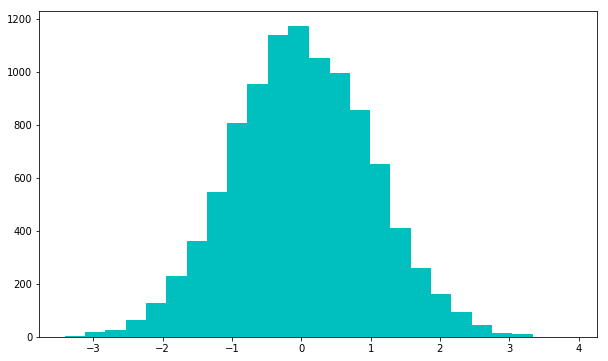

In [3]:

plt.figure( figsize=(10,6) )
d.plot( n=10000, edgecolor='c', facecolor='c', alpha=1, bins=25 )




<p>Good, this looks like a normal distribution.</p>
<p>The most common task is to try to determine the probability of some points given the distribution, <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;P&lt;/mi&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mi&gt;D&lt;/mi&gt;&lt;mrow class="MJX-TeXAtom-ORD"&gt;&lt;mo stretchy="false"&gt;|&lt;/mo&gt;&lt;/mrow&gt;&lt;mi&gt;M&lt;/mi&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;/math&gt;' id="MathJax-Element-3-Frame" role="presentation" style="position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-7" style="width: 3.872em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.217em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.67em, 1003.16em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-8"><span class="mi" id="MathJax-Span-9" style="font-family: STIXGeneral-Italic;">P</span><span class="mo" id="MathJax-Span-10" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-11" style="font-family: STIXGeneral-Italic;">D</span><span class="texatom" id="MathJax-Span-12"><span class="mrow" id="MathJax-Span-13"><span class="mo" id="MathJax-Span-14" style="font-family: STIXVariants;">|</span></span></span><span class="mi" id="MathJax-Span-15" style="font-family: STIXGeneral-Italic;">M<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span class="mo" id="MathJax-Span-16" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.218em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>P</mi><mo stretchy="false">(</mo><mi>D</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mi>M</mi><mo stretchy="false">)</mo></math></span></span><script id="MathJax-Element-3" type="math/tex">P(D|M)</script>, where the model is just this distribution.</p>


In [5]:

print(d.log_probability(  2 ))
print(d.log_probability( -2 ))



-2.9189385332042734
-2.9189385332042734



<p>The log probability for both are the same, which makes sense since they're both the same distance from 0. Calculating log probabilities are more efficient than calculating probabilities, and usually lead to more efficient downstream algorithms, and so are the only option provided.</p>


In [6]:

import timeit
from scipy.stats import norm

print("scipy norm: {}s".format( timeit.timeit( "norm.logpdf(2, 0, 1)", setup="from scipy.stats import norm", number=10000 ) ))
print("pomegranate: {}s".format( timeit.timeit( "d.log_probability(2)", setup="from pomegranate import NormalDistribution; d = NormalDistribution(0, 1)", number=10000) ))
print("logp difference: {}".format( norm.logpdf(2, 0, 1) - d.log_probability( 2 ) ))



scipy norm: 1.2885404560074676s
pomegranate: 0.06895836198236793s
logp difference: -3.992361996552063e-13



<p>The next most common operation is to try to train this model on some data. If we train a distribution, we ignore its current parameterization, and instead calculate the MLE estimates as to the parameters. Lets train the distribution on points drawn from <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;N&lt;/mi&gt;&lt;mi&gt;o&lt;/mi&gt;&lt;mi&gt;r&lt;/mi&gt;&lt;mi&gt;m&lt;/mi&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mn&gt;0.4&lt;/mn&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;mn&gt;0.9&lt;/mn&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;/math&gt;' id="MathJax-Element-4-Frame" role="presentation" style="position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-17" style="width: 7.146em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.955em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.729em, 1005.9em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-18"><span class="mi" id="MathJax-Span-19" style="font-family: STIXGeneral-Italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span class="mi" id="MathJax-Span-20" style="font-family: STIXGeneral-Italic;">o</span><span class="mi" id="MathJax-Span-21" style="font-family: STIXGeneral-Italic;">r<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-22" style="font-family: STIXGeneral-Italic;">m</span><span class="mo" id="MathJax-Span-23" style="font-family: STIXGeneral-Regular;">(</span><span class="mn" id="MathJax-Span-24" style="font-family: STIXGeneral-Regular;">0.4</span><span class="mo" id="MathJax-Span-25" style="font-family: STIXGeneral-Regular;">,</span><span class="mn" id="MathJax-Span-26" style="font-family: STIXGeneral-Regular; padding-left: 0.182em;">0.9</span><span class="mo" id="MathJax-Span-27" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.146em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>N</mi><mi>o</mi><mi>r</mi><mi>m</mi><mo stretchy="false">(</mo><mn>0.4</mn><mo>,</mo><mn>0.9</mn><mo stretchy="false">)</mo></math></span></span><script id="MathJax-Element-4" type="math/tex">Norm(0.4, 0.9)</script>, and see if we can recover the underlying distribution. Since we're trying to stick to scikit-learns interface as closely as possible, we use the fit method.</p>


In [7]:

data = np.random.randn(100) * 0.9 + 0.4
d.fit( data )




<p>We can see that we recovered the distribution fairly well.</p>
<p>pomegranate does distribution fitting in summary statistics and cython, so it is significantly faster than other options. Lets see how long it takes to train a pomegranate distribution, versus using numpy.</p>


In [8]:
%timeit data.mean(); data.std()
%timeit d.fit( data )



40.8 µs ± 7.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
13.4 µs ± 787 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)



<p>Looks like it's ~3x faster.</p>
<p>Since numpy uses summary statistics, these updates can be done out of core using <code>summarize</code> followed by <code>from_summaries</code>, and still get exact answers. <code>summarize</code> will summarize the data into summary statistics, and allow you to get more data, before finally updating the parameters of the distribution in the <code>from_summaries</code> method. Lets look at this in action.</p>


In [13]:
for i in range(10):
    data = np.random.randn(10000) * 2.583 + 17.813
    d.summarize(data)

d.from_summaries()
print ("Norm({:.5}, {:.5})".format(*d.parameters))



Norm(17.824, 2.5845)



<p>Expectedly, we get close, but not exact, recovery of the parameters.</p>
<p>We can also serialize this into a JSON for human readability, or future storage after a computationally intensive training step.</p>


In [15]:

print(d.to_json())



{
    "class" :"Distribution",
    "name" :"NormalDistribution",
    "parameters" :[
        17.82376926325073,
        2.5844692477474305
    ],
    "frozen" :false
}



<h3 id="Discrete-Distribution">Discrete Distribution<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Discrete-Distribution">¶</a></h3><p>A second commonly used distribution is the discrete distribution, which contains a fixed set of keys, and their associated probabilities. In pomegranate, the keys can be ~any~ Python object. They are instantiated by passing in a dictionary with the associated keys and values.</p>


In [16]:

d = DiscreteDistribution({'A': 0.1, 'C': 0.25, 'G': 0.50, 'T': 0.15})




<p>All of the previous functions still work (except plot). We can calculate the log probability of points under this distribution, which is just a dictionary lookup.</p>


In [17]:

print("P({}|M) = {:.3}".format( 'A', np.e ** d.log_probability( 'A' ) ))
print("P({}|M) = {:.3}".format( 'G', np.e ** d.log_probability( 'G' ) ))
print("P({}|M) = {:.3}".format( '?', np.e ** d.log_probability( '?' ) ))



P(A|M) = 0.1
P(G|M) = 0.5
P(?|M) = 0.0



<p>We can also train on lists of data.</p>


In [19]:

d.fit( list('CAGCATCATCATCATAGCACCATAGAAAGATAAAAT') )
print(d.parameters)



[{'A': 0.4722222222222222, 'C': 0.2222222222222222, 'G': 0.1111111111111111, 'T': 0.19444444444444445}]



<p>And we can also serialize it into a JSON.</p>


In [20]:

print(d.to_json())



{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.4722222222222222,
            "C" :0.2222222222222222,
            "G" :0.1111111111111111,
            "T" :0.19444444444444445
        }
    ],
    "frozen" :false
}



<h3 id="Kernel-Densities">Kernel Densities<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Kernel-Densities">¶</a></h3><p>The above distributions were parametric, in that they were defined by a handful of parameters. Sometimes, this can lose the excentricities of the data. In contrast, nonparametric distributions require only data, not parameters. We can see this clearly below, where we have some points drawn from the unit norm distribution, and a few outliers.</p>


{
    "class" :"Distribution",
    "name" :"NormalDistribution",
    "parameters" :[
        1.0339037728876261,
        2.598699069031102
    ],
    "frozen" :false
}


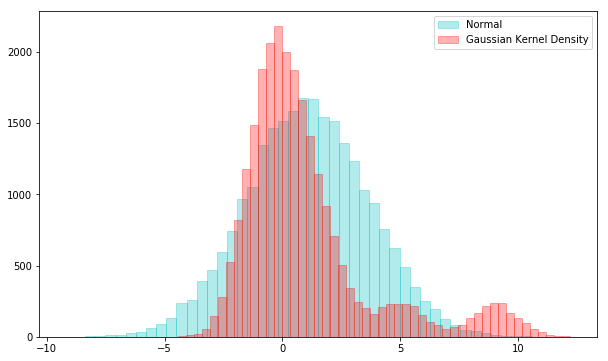

In [23]:
data = np.concatenate( (np.random.randn(12), [2, 5, 9] ))

plt.figure( figsize=(10, 6))

d1 = NormalDistribution(0, 1)
d1.fit( data )
print(d1.to_json())
d1.plot( n=25000, edgecolor='c', facecolor='c', bins=50, alpha=0.3, label="Normal" )

d2 = GaussianKernelDensity(data)
d2.plot( n=25000, edgecolor='r', facecolor='r', bins=50, alpha=0.3, label="Gaussian Kernel Density" )
plt.legend()


<p>We can see that the Gaussian Kernel Densities can be especially useful in modelling outliers without having to come up with complicated distributions. A downside is that calculating log probabilities takes time proportional to the number of points in the kernel density, as opposed to constant time. It's much like kNN in that it takes <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;O&lt;/mi&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mn&gt;1&lt;/mn&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;/math&gt;' id="MathJax-Element-5-Frame" role="presentation" style="position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-28" style="width: 2.324em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.908em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.729em, 1001.85em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-29"><span class="mi" id="MathJax-Span-30" style="font-family: STIXGeneral-Italic;">O</span><span class="mo" id="MathJax-Span-31" style="font-family: STIXGeneral-Regular;">(</span><span class="mn" id="MathJax-Span-32" style="font-family: STIXGeneral-Regular;">1</span><span class="mo" id="MathJax-Span-33" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.146em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>O</mi><mo stretchy="false">(</mo><mn>1</mn><mo stretchy="false">)</mo></math></span></span><script id="MathJax-Element-5" type="math/tex">O(1)</script> to train, and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;O&lt;/mi&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mi&gt;n&lt;/mi&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;/math&gt;' id="MathJax-Element-6-Frame" role="presentation" style="position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-34" style="width: 2.324em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.908em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.729em, 1001.85em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-35"><span class="mi" id="MathJax-Span-36" style="font-family: STIXGeneral-Italic;">O</span><span class="mo" id="MathJax-Span-37" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-38" style="font-family: STIXGeneral-Italic;">n</span><span class="mo" id="MathJax-Span-39" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.146em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>O</mi><mo stretchy="false">(</mo><mi>n</mi><mo stretchy="false">)</mo></math></span></span><script id="MathJax-Element-6" type="math/tex">O(n)</script> to predict.</p>


In [24]:

%timeit d1.log_probability(5)
%timeit d2.log_probability(5)



4.56 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.6 µs ± 648 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)



<p>Even with intermediate state caching, the Gaussian kernel density is ~5x slower on only 12 points. This is even after a recent update where I made them &gt;30x faster than they used to be.</p>
<p>However, it is true that kernel densities do have a parameter, which is the bandwidth. For Gaussian kernel densities, it is similar to adjusting the variance in the Gaussian distribution. Lets take a look:</p>


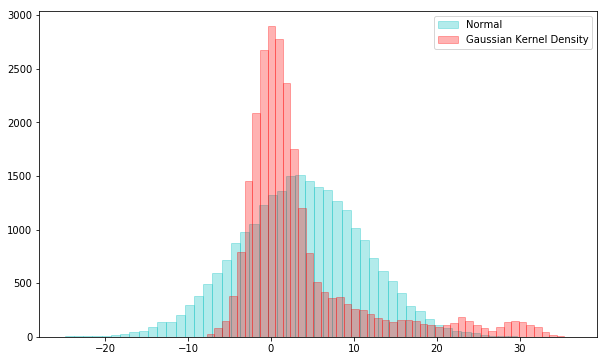

In [29]:

plt.figure( figsize=(10, 6))

d1 = NormalDistribution(0, 1)
d1.fit( data )
d1.plot( n=25000, edgecolor='c', facecolor='c', bins=50, alpha=0.3, label="Normal" )

d2 = GaussianKernelDensity(data, bandwidth=2)
d2.plot( n=25000, edgecolor='r', facecolor='r', bins=50, alpha=0.3, label="Gaussian Kernel Density" )
plt.legend()




<p>We can clearly see now that the outliers are dragging the normal distribution to the right, but the kernel density remains unchanged. We can look at a slightly more extreme example to see this truly.</p>


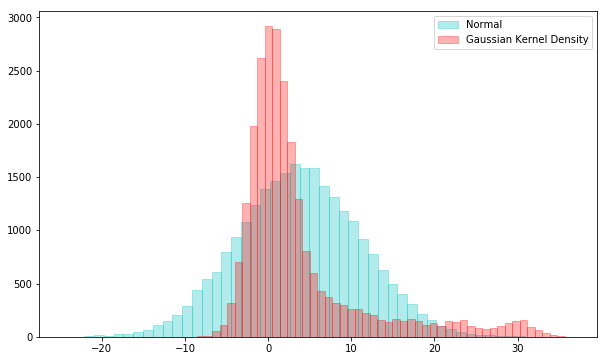

In [34]:
data = np.concatenate( (np.random.randn(20), [1.5, 2, 3, 5, 7, 9, 12, 17, 23, 30] ))

plt.figure( figsize=(10, 6))

d1 = NormalDistribution(0, 1)
d1.fit( data )
d1.plot(n=25000, edgecolor='c', facecolor='c', bins=50, alpha=0.3, label="Normal" )

d2 = GaussianKernelDensity(data, bandwidth=2)
d2.plot( n=25000, edgecolor='r', facecolor='r', bins=50, alpha=0.3, label="Gaussian Kernel Density" )
plt.legend()


<p>This kernel density can thus capture heavy tailed distributions without having an unnecessarily skewed variance. Lastly, you can also assign weights to all of the points if you choose to. We can see what this looks like when we highly weight the outliers.</p>


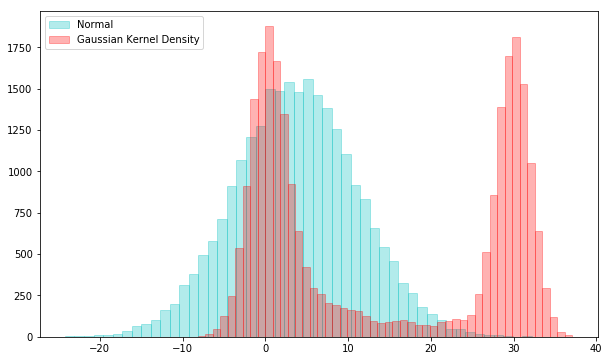

In [35]:

plt.figure(figsize=(10, 6))

d1 = NormalDistribution(0, 1)
d1.fit( data )
d1.plot( n=25000, edgecolor='c', facecolor='c', bins=50, alpha=0.3, label="Normal" )

d2 = GaussianKernelDensity(data, bandwidth=2, weights=[1]*20 + [1, 1, 1, 1, 1, 1, 1, 1, 1, 20])
d2.plot( n=25000, edgecolor='r', facecolor='r', bins=50, alpha=0.3, label="Gaussian Kernel Density" )
plt.legend()


<h3 id="IndependentComponentsDistribution">IndependentComponentsDistribution<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#IndependentComponentsDistribution">¶</a></h3><p>Sometimes, a univariate distribution isn't good enough. Many times data comes in the form of multiple, independent, dimensions, each with their own distribution. We can model this with a multivariate distribution which contains a tuple of independent components.</p>
<p>A common example may be to look at data whose signal is normally distributed, and whose duration is modelled by an exponential.</p>


In [39]:
d = IndependentComponentsDistribution([ NormalDistribution(10, 1), ExponentialDistribution(0.5) ])
print(d.log_probability( (11, 3) ))



-3.612085713764219



<p>We can also weight the contributions of each distribution. In this example, lets say that the signal is far more important than the duration.</p>


In [41]:
d = IndependentComponentsDistribution([ NormalDistribution(10, 1), ExponentialDistribution(0.5) ], weights=[3, 1])
print(d.log_probability( (11, 3) ))



-6.449962780172767



<p>We see that the point becomes more probable, because we care more about the good fit to the signal dimension (the normal distribution) than it poorly fits the duration (exponential) distribution. You must be careful with the weightings though, because they don't have to sum to 1. In this sense, weights = [3,1] is not the same as weights = [0.75, 0.25].</p>
<p>We can do updates in the same manner. Drawing sampels from a Gaussian with mu = 12 and sigma = 2, and an exponential with mu = 5 (0.2 since the inverse mu is more prominently used to parameterize an exponential), we can estimate the underlying distributions with 1000 points.</p>


In [44]:
data = numpy.zeros((1000, 2))
data[:,0] = np.random.randn(1000) * 2 + 12 
data[:,1] = np.random.exponential(5, 1000)
print(data[:5])
d.fit(data)

norm = d.parameters[0][0].parameters
exp = d.parameters[0][1].parameters

print("Norm({:.5}, {:.5}), Exp({:.5})".format( norm[0], norm[1], exp[0] ))



[[ 8.24972175  0.01928614]
 [12.94665765 14.65501466]
 [11.18505571  2.51353643]
 [12.97740028  9.16266315]
 [13.25430262 10.25926891]]
Norm(12.07, 2.027), Exp(0.19685)



<h3 id="Multivariate-Gaussian-Distribution">Multivariate Gaussian Distribution<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Multivariate-Gaussian-Distribution">¶</a></h3><p>It's not always good enough to have independent distributions, as signals can be heavily correlated. A common distribution for this is the multivariate gaussian distribution, utilizing a full covariance matrix. You provide a vector of mus, and a covariance matrix, and you're good to go!</p>


In [61]:

d = MultivariateGaussianDistribution( np.zeros(5), np.eye(5) )
print(d.sample())



[-2.26787289 -1.36005247  0.90978795 -1.40966142  0.56238583]



<p>We can now train on data which has a diagonal covariance matrix, but whose mu's are now [0, 8, 16, 24, 32] instead of [0, 1, 2, 3, 4]. Lets see how well the model captures the underlying distribution.</p>


In [64]:

data = np.random.randn(1000, 5) + np.arange(5) * 8

d.fit(data)
print("mu: [{:.5}, {:.5}, {:.5}, {:.5}, {:.5}]".format( *d.parameters[0] ))
print("cov: \n {}".format( np.array(d.parameters[1])))



mu: [-0.020309, 7.9998, 16.009, 23.994, 32.007]
cov: 
 [[ 0.99476602  0.01959664 -0.02565557 -0.01502782  0.00466065]
 [ 0.01959664  1.05514398  0.03151448 -0.01720308  0.00917323]
 [-0.02565557  0.03151448  0.95282003  0.00766867  0.01247204]
 [-0.01502782 -0.01720308  0.00766867  0.95295547 -0.00629786]
 [ 0.00466065  0.00917323  0.01247204 -0.00629786  0.9870768 ]]


In [65]:

print(d.sample())



[ 0.72213018  8.08048673 15.52924601 22.77516186 31.11648861]



<p>pomegranate is also faster than numpy in calculating these, due to an efficient cython implementation for calculating the covariance directly, instead of doing vector-matrix-vector multiplication, which allocates intermediate arrays.</p>


In [66]:

%timeit data.mean( axis=0 ), np.cov( data.T )
%timeit d.fit(data)



227 µs ± 78.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
287 µs ± 64.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



<h3 id="Naive-Bayes">Naive Bayes<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Naive-Bayes">¶</a></h3><p>Given these tools, it's pretty simple to set up a Naive Bayes classifier using any combination of distributions you'd like. While not currently built in, you can set up the code in the following way:</p>


In [82]:

def naive_bayes_fit( x, y, distributions ):
    """
    Fit a Naive Bayes classifier to some data.
    """
    n = len(distributions)
    w = numpy.zeros( len(distributions))
    for i in range(n):
        data = x[y==i, 0]
        distributions[i].fit( data )
        w[i] = data.shape[0]
    return w
    
def naive_bayes_predict( x, distributions, weights ):
    """
    A Naive Bayes classifier. Calculate the normalized probability
    of the point under each distribution.
    """
    
    n = len(distributions)
    probs, total = numpy.zeros(n), 0
    for i in range(n):
        probs[i] = np.e ** distributions[i].log_probability(x) * weights[i]
        total += probs[i]
    
    return probs / total



In [83]:

from sklearn.naive_bayes import GaussianNB

x = numpy.array([np.concatenate( (np.random.randn(1000), np.random.randn(750) + 2) )]).T
y = np.concatenate( (np.zeros(1000), np.ones(750)) )

clf = GaussianNB()
ds = [ NormalDistribution(5, 1), NormalDistribution(7, 1) ]



In [84]:

%timeit naive_bayes_fit( x, y, ds )
%timeit clf.fit( x, y )



92 µs ± 3.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
585 µs ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



<p>Looks like pomegranate is faster at Naive Bayes too, but lets make sure we've come to the same distribution in the end.</p>


In [85]:

w = naive_bayes_fit( x, y, ds )

print(naive_bayes_predict( 1, ds, w ))
print(clf.predict_proba( 1 ))

[0.58714567 0.41285433]
[[0.58714567 0.41285433]]



<h2 id="General-Mixture-Models">General Mixture Models<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#General-Mixture-Models">¶</a></h2><p>It is frequently the case that the data you have is not explained by a single underlying distribution. If we want to try to recover the underlying distributions, we need to have a model which has multiple components. An example is the following data, which is clearly two gaussian distributions, but with different parameters.</p>


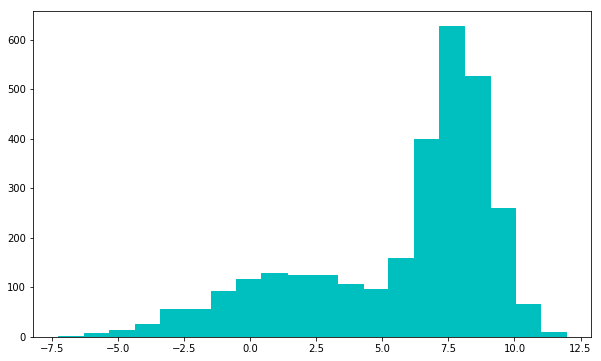

In [89]:

data = np.concatenate( (np.random.randn(1000) * 2.75 + 1.25, np.random.randn(2000) * 1.2 + 7.85) )

plt.figure( figsize=(10,6))
plt.hist( data, edgecolor='c', color='c', bins=20 )
plt.show()




<p>We must start with an initial estimate of what this distribution is. In this case, we would likely initialize our General Mixture Model to be of two Gaussian distributions, one centered around 2 with a unit variance, and the other centered around 8 with a unit variance. It looks like there are more points in the distribution to the right, so maybe we want to start off with a higher weight on that distribution.</p>


In [102]:

weights = np.array([0.33, 0.67])
d = GeneralMixtureModel( [NormalDistribution(2, 1), NormalDistribution(8, 1)], weights=weights )


<p>Before we do any training, lets take a look at what the model predicts. All models have a <code>fit</code> and a <code>predict</code> method, in keeping with the scikit-learn API. In this case, we want to predict each point and see which component it falls under.</p>


In [109]:
labels = d.predict(data.reshape((3000, 1)))
print("{} 1 labels, {} 0 labels".format( labels.sum(), labels.shape[0] - labels.sum() ))

2090 1 labels, 910 0 labels



<p>We started off with 2000 1 labels and 1000 0 labels, so this is somewhat close. It's a decent first look. But we can go on to visualize this to get a better look.</p>


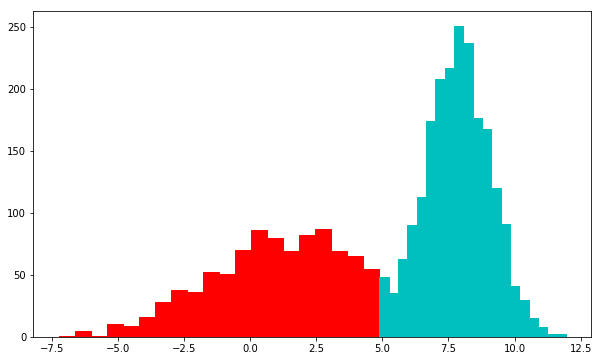

In [110]:

plt.figure( figsize=(10,6) )
plt.hist( data[ labels == 0 ], edgecolor='r', color='r', bins=20 )
plt.hist( data[ labels == 1 ], edgecolor='c', color='c', bins=20 )
plt.show()




<p>This looks okay. We see there is a clear linear boundary between the two. This makes sense, because if you have two Gaussians of any dimensionality, the best separator is just a hyperplane. This is one of the reasons that Naive Bayes and Logistic Regresson can work very well on Gaussian distributed data.</p>
<p>However, we are using <b>probabilistic</b> models here. We should take advantage of this, and predict the probability that each point belongs to each distribution, in order to get softer estimates.</p>
<p>In keeping with the scikit-learn API, if we want probabilistic measurements we use the <code>predict_proba</code> method, and columns become each component and rows become each sample.</p>


In [114]:

labels = d.predict_proba( data.reshape(3000, 1) )
print(labels[:5])
print("{} 0 labels, {} 1 labels".format( *labels.sum(axis=0) ))



[[1.00000000e+00 1.56633124e-24]
 [1.00000000e+00 1.39498213e-20]
 [9.99202731e-01 7.97268587e-04]
 [9.99999998e-01 2.34569261e-09]
 [1.00000000e+00 2.44472227e-26]]
911.3097635716204 0 labels, 2088.6902364283796 1 labels



<p>Looks like we get ~1% closer. This is not terribly significant, but useful when we do training, which uses the expectation-maximization (EM) algorithm. I won't go into the details here, but the gist is that we want to train this distribution in an unsupervised fashion, and so we iterate between expectation (calculating probabilities of each point given the data) and maximization (updating model parameters given these probabilities). We iterate between those two steps until convergence.</p>


In [115]:
d.fit( data, verbose=True )

[1] Improvement: 2287.165231536502	Time (s): 0.00069
[2] Improvement: 8.852726429561699	Time (s): 0.0006292
[3] Improvement: 3.3959233272007623	Time (s): 0.0006223
[4] Improvement: 1.98403962165321	Time (s): 0.001764
[5] Improvement: 1.2369260586774544	Time (s): 0.000711
[6] Improvement: 0.7934977974273352	Time (s): 0.00069
[7] Improvement: 0.5203803540061926	Time (s): 0.001591
[8] Improvement: 0.3474982089119294	Time (s): 0.000648
[9] Improvement: 0.23550331555998127	Time (s): 0.000701
[10] Improvement: 0.16153351438788377	Time (s): 0.0008972
[11] Improvement: 0.11188926114209607	Time (s): 0.0008671
[12] Improvement: 0.07812760055912804	Time (s): 0.001026
Total Improvement: 2304.8832770255895
Total Time (s): 0.0133


{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                1.4307311673749712,
                2.924733266547081
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                7.8995164841960746,
                1.1864244121476835
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        0.3391970837286428,
        0.6608029162713572
    ]
}

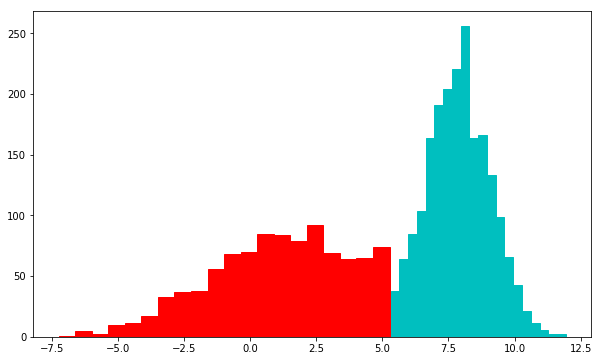

Hard Classification
960 0 labels, 2040 1 labels
Soft Classification
1020.1883281576445 0 labels, 1979.8116718423555 1 labels


In [118]:
labels = d.predict( data.reshape(3000, 1) )

plt.figure( figsize=(10,6) )
plt.hist( data[ labels == 0 ], edgecolor='r', color='r', bins=20 )
plt.hist( data[ labels == 1 ], edgecolor='c', color='c', bins=20 )
plt.show()

print("Hard Classification")
print("{} 0 labels, {} 1 labels".format( labels.shape[0] - labels.sum(), labels.sum() ))


print("Soft Classification")
labels = d.predict_proba( data.reshape(3000, 1))
print("{} 0 labels, {} 1 labels".format( *labels.sum(axis=0) ))


<p>Training the models exemplifies why sometimes we want to use soft classification. The difference between 981 and 944 is significant, particularly in fuzzy cases where it's not always clear what's going on. As a continued theme, it allows us to bring our uncertainty along with us, and make more informed decisions because of this.</p>
<h3 id="Gaussian-Mixture-Models">Gaussian Mixture Models<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Gaussian-Mixture-Models">¶</a></h3><p>However, a more common type of mixture model is the Gaussian Mixture Model, commonly confused with the General Mixture Model because they share similar names. However, the General Mixture Model can be a mixture of any number of distributions of heterogeneous types.</p>
<p>Lets take a look at a Gaussian Mixture Model using MultivariateGaussianDistributions.</p>


(500, 2)
(750, 2)


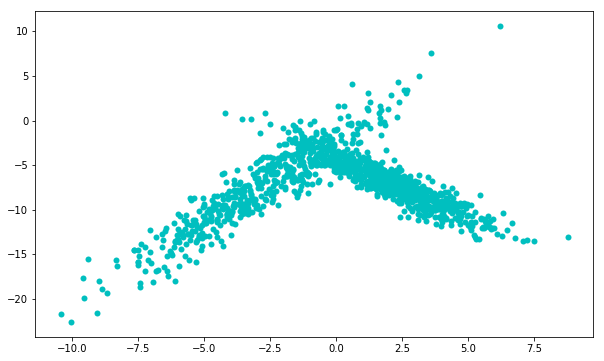

In [121]:

from pomegranate import MultivariateGaussianDistribution as Gaussian

cov = [[0.5, -0.8], [2.4, 4.7]]
a = (np.random.randn(500, 2) + [1, -1.5]).dot( cov )
cov = [[-1.2, 0.8], [1.3, -2.3]]
b = (np.random.randn( 750, 2 ) + [2.5, 4]).dot( cov )
data = np.concatenate((a, b))

plt.figure( figsize=(10, 6))
plt.scatter( data[:,0], data[:,1], c='c', linewidth=0 )
plt.show()



[[9.97429029e-01 2.57097147e-03]
 [9.99999947e-01 5.34013661e-08]
 [1.00000000e+00 6.12223169e-11]
 ...
 [1.41986598e-06 9.99998580e-01]
 [4.94438139e-06 9.99995056e-01]
 [1.99262043e-18 1.00000000e+00]]


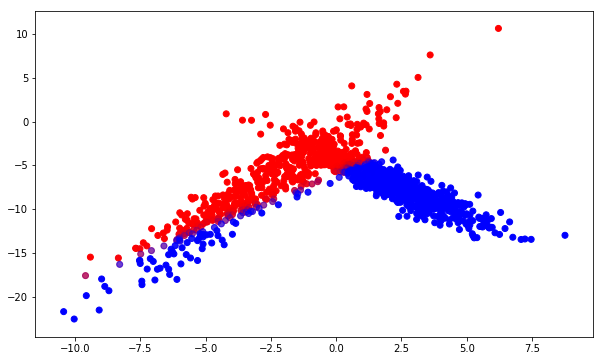

In [122]:
cov = np.eye(2)
gmm = GeneralMixtureModel([ Gaussian([-4, -5], cov), Gaussian([2.0, -10], cov) ])
pred = gmm.predict_proba( data )

plt.figure( figsize=(10, 6) )

colors_a = np.zeros((data.shape[0], 4))
colors_a[:,0] = 1
colors_a[:,3] = pred[:,0]

plt.scatter( data[:,0], data[:,1], color=colors_a )

colors_b = np.zeros((data.shape[0], 4))
colors_b[:,2] = 1
colors_b[:,3] = pred[:,1]
plt.scatter( data[:,0], data[:,1], color=colors_b )
plt.show()



In [123]:

gmm.fit( data, verbose=True )



[1] Improvement: 10030.837827699717	Time (s): 0.001143
[2] Improvement: 347.72330579449954	Time (s): 0.002094
[3] Improvement: 474.1907981156719	Time (s): 0.001575
[4] Improvement: 160.64087922587714	Time (s): 0.001586
[5] Improvement: 20.307051574801335	Time (s): 0.001492
[6] Improvement: 2.6310350824842317	Time (s): 0.001487
[7] Improvement: 0.4155904292683772	Time (s): 0.001486
[8] Improvement: 0.06579838715333608	Time (s): 0.001407
Total Improvement: 11036.812286309472
Total Time (s): 0.0148


{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "MultivariateGaussianDistribution",
            "parameters" : [
                [
                    -2.993248230206916,
                    -7.631048374687831
                ],
                [
                    [
                        6.134235740696701,
                        11.27924941898307
                    ],
                    [
                        11.27924941898307,
                        23.58615809592366
                    ]
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "MultivariateGaussianDistribution",
            "parameters" : [
                [
                    2.119096505580688,
                    -7.081972745010563
                ],
                [
                    [
                        3.2713941530899815,
    

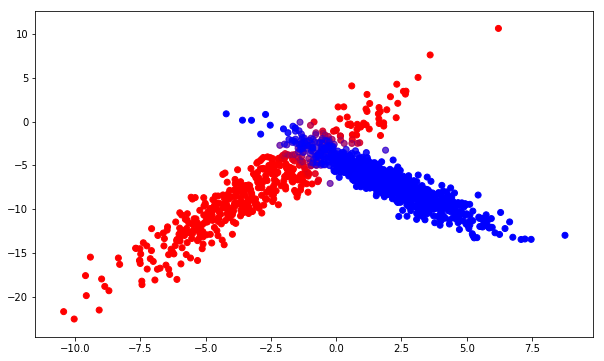

In [124]:

plt.figure( figsize=(10, 6) )
pred = gmm.predict_proba( data )

colors_a = np.zeros((data.shape[0], 4))
colors_a[:,0] = 1
colors_a[:,3] = pred[:,0]

plt.scatter( data[:,0], data[:,1], color=colors_a )

colors_b = np.zeros((data.shape[0], 4))
colors_b[:,2] = 1
colors_b[:,3] = pred[:,1]
plt.scatter( data[:,0], data[:,1], color=colors_b )
plt.show()



In [126]:

import timeit 
print("scikit-learn: {}s".format( timeit.timeit( "d.fit(data)", setup="from sklearn.mixture import GMM; from __main__ import data; d=GMM(n_components=2, covariance_type='full')", number=100 ) ))
print("pomegranate: {}s".format( timeit.timeit( "d.fit(data, stop_threshold=1e-3)", setup="from pomegranate import *; from __main__ import data; import numpy; cov = numpy.eye(2); d=GeneralMixtureModel([ MultivariateGaussianDistribution([-4, -5], cov), MultivariateGaussianDistribution([2.0, -10], cov) ])", number=100 )))



/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

scikit-learn: 8.291907320002792s


/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6/lib/python/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chuck/Library/Python/3.6

SyntaxError: import * only allowed at module level (<timeit-src>, line 2)


<p>pomegranate is several times faster than scikit-learn in this case, though scikit-learn does offer more fully-featured GMMs (such as DPGMM and tied covariance matrices), and it is a bit easier to initialize a GMM.</p>



<h2 id="Hidden-Markov-Models">Hidden Markov Models<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Hidden-Markov-Models">¶</a></h2><p>Hidden Markov models (HMMs) are the flagship of the pomegranate package, in that most time is spent improving their implementation, and these improvements sometimes trickle down into the other algorithms. Lets delve into the features which pomegranate offers.</p>
<p>Hidden Markov models are a form of structured prediction method which extend general mixture models to sequences of data, where position in the sequence is relevant. If each point in this sequence is completely independent of the other points, then HMMs are not the right tools and GMMs (or more complicated Bayesian networks) may be a better tool.</p>
<p>The most common examples of HMMs come from bioinformatics and natural language processing. Since I am a bioinformatician, I will predominately use examples from bioinformatics.</p>
<p>Lets take the simplified example of CG island detection on a sequence of DNA. DNA is made up of the four canonical nucleotides, abbreviated 'A', 'C', 'G', and 'T'. Specific organizations of these nucleotides encode enough information to build you, a human being. One simple region in the genome is called the 'CG' island, where the nucleotides 'C' and 'G' are enriched. Lets compare the predictions of a GMM with the predictions of a HMM, to both understand conceptually the differences between the two, and to see how easy it is to use pomegranate.</p>


In [ ]:

seq = list('CGACTACTGACTACTCGCCGACGCGACTGCCGTCTATACTGCGCATACGGC')

d1 = DiscreteDistribution({'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25})
d2 = DiscreteDistribution({'A': 0.10, 'C': 0.40, 'G': 0.40, 'T': 0.10})

# General Mixture Model Setup
gmm = GeneralMixtureModel( [d1, d2] )

# Hidden Markov Model Setup
s1 = State( d1, name='background' )
s2 = State( d2, name='CG island' )

hmm = HiddenMarkovModel('Island Finder')
hmm.add_states(s1, s2)
hmm.add_transition( hmm.start, s1, 0.5 )
hmm.add_transition( hmm.start, s2, 0.5 )
hmm.add_transition( s1, s1, 0.5 )
hmm.add_transition( s1, s2, 0.5 )
hmm.add_transition( s2, s1, 0.5 )
hmm.add_transition( s2, s2, 0.5 )
hmm.bake()

plt.figure( figsize=(10,6) )
hmm.draw()



In [ ]:

gmm_predictions = gmm.predict( np.array(seq) )
hmm_predictions = hmm.predict( seq )

print "sequence: {}".format( ''.join( seq ) )
print "gmm pred: {}".format( ''.join( map( str, gmm_predictions ) ) )
print "hmm pred: {}".format( ''.join( map( str, hmm_predictions ) ) )




<p>Note: The HMM and GMM predictions may be the inverse of each other, because HMM states undergo a topological sort in order to properly handle silent states (more later), which can change from the order they were inserted into the model.</p>
<p>At this point, a dense HMM with equal probabilities between each state is ~equivalent~ to a GMM. However, this framework gives us great flexibility to add prior knowledge through edge transition probabilities, whereas a GMM doesn't. If we look at the predictions, we see that it's bifurcating between "background" and "CG island" very quickly--in essence, calling every C or G a 'CG island'. This is not likely to be true. We know that CG islands have some As and Ts in them, and background sequence has Cs and Gs. We can change the transition probabilities to account for this, and prevent switching from occuring too rapidly.</p>


In [ ]:

hmm = HiddenMarkovModel()
hmm.add_states(s1, s2)
hmm.add_transition( hmm.start, s1, 0.5 )
hmm.add_transition( hmm.start, s2, 0.5 )
hmm.add_transition( s1, s1, 0.9 )
hmm.add_transition( s1, s2, 0.1 )
hmm.add_transition( s2, s1, 0.1 )
hmm.add_transition( s2, s2, 0.9 )
hmm.bake()

plt.figure( figsize=(10,6) )
hmm.draw()
hmm_predictions = hmm.predict( seq )

print "sequence: {}".format( ''.join( seq ) )
print "gmm pred: {}".format( ''.join( map( str, gmm_predictions ) ) )
print "hmm pred: {}".format( ''.join( map( str, hmm_predictions ) ) )
print
print "hmm state 0: {}".format( hmm.states[0].name )
print "hmm state 1: {}".format( hmm.states[1].name )




<p>This seems far more reasonable. There is a single CG island surrounded by background sequence, and something at the end. If we knew that CG islands cannot occur at the end of sequences, we need only modify the underlying structure of the HMM in order to say that the sequence must end from the background state.</p>


In [ ]:

hmm = HiddenMarkovModel()
hmm.add_states(s1, s2)
hmm.add_transition( hmm.start, s1, 0.5 )
hmm.add_transition( hmm.start, s2, 0.5 )
hmm.add_transition( s1, s1, 0.89 )
hmm.add_transition( s1, s2, 0.10 )
hmm.add_transition( s1, hmm.end, 0.01 )
hmm.add_transition( s2, s1, 0.1 )
hmm.add_transition( s2, s2, 0.9 )
hmm.bake()

plt.figure( figsize=(10,6) )
hmm.draw()

hmm_predictions = hmm.predict( seq )

print "sequence: {}".format( ''.join( seq ) )
print "gmm pred: {}".format( ''.join( map( str, gmm_predictions ) ) )
print "hmm pred: {}".format( ''.join( map( str, hmm_predictions ) ) )
print
print "hmm state 0: {}".format( hmm.states[0].name )
print "hmm state 1: {}".format( hmm.states[1].name )




<p>Looks like we managed to get rid of that pesky end (again, the numbers may have flipped, look at the indices). Modifying transition probabilities and using non-dense graphical structures are two major ways in which HMMs account for data in a sequence not being independent and identically distributed (i.i.d.). In fact, in most applications, the graphical structure of a HMM is very sparse.</p>
<p>If we want a more probabilistic view of what's going on, we can get the probability of each symbol in the sequence being in each of the states in the model easily. This is useful to get a soft estimate of classification, which allows us to include confidence as well as prediction. Values close to 50-50 get masked when you make hard classifications, but this uncertainty can be passed to future applications if you use soft assignments. Each row in the matrix is one symbol in the sequence, and the columns correspond to the two states identified above (CG island or background).</p>


In [ ]:

print hmm.predict_proba( seq )




<p>There is a corresponding hmm.predict_log_proba method present if you want to get the log values. These are the emission probability values calculated by the forward backward algorithm, and can also be retrieved by calling hmm.forward_backward( seq ), which returns both the emission and the transition probability tables.</p>
<p>Lets take a look at these tables!</p>


In [ ]:

trans, ems = hmm.forward_backward( seq )
print trans




<p>This is the transition table, which has the soft count of the number of transitions across an edge in the model given a single sequence. It is a square matrix of size equal to the number of states (including start and end state), with number of transitions from (row_id) to (column_id). This is exemplified by the 1.0 in the first row, indicating that there is one transition from background state to the end state, as that's the only way to reach the end state. However, the third (or fourth, depending on ordering) row is the transitions from the start state, and it only slightly favors the background state. These counts are not normalized to the length of the input sequence, but can easily be done so by dividing by row sums, column sums, or entire table sums, depending on your application.</p>
<p>A possible reason not to normalize is to run several sequences through and add up their tables, because normalizing in the end and extracting some domain knowledge. It is extremely useful in practice. For example, we can see that there is an expectation of 2.8956 transitions from CG island to background, and 2.4 from background to CG island. This could be used to infer that there are ~2-3 edges, which makes sense if you consider that the start and end of the sequence seem like they might be part of the CG island states except for the strict transition probabilities used (look at the first few rows of the emission table above.)</p>
<p>We've been using the forward backward algorithm and maximum a posteriori for decoding thus far, however maximum a posteriori decoding has the side effect that it is possible that it predicts impossible sequences in some edge cases. An alternative is Viterbi decoding, which at each step takes the most likely path, instead of sum of all paths, to produce hard assignments.</p>


In [ ]:

hmm_predictions = hmm.predict( seq, algorithm='viterbi' )[1:-1]

print "sequence: {}".format( ''.join( seq ) )
print "gmm pred: {}".format( ''.join( map( str, gmm_predictions ) ) )
print "hmm pred: {}".format( ''.join( map( str, hmm_predictions ) ) )
print
print "hmm state 0: {}".format( hmm.states[0].name )
print "hmm state 1: {}".format( hmm.states[1].name )




<p>We see here a case in which it does not do too well. The Viterbi path can be more conservative in its transitions due to the hard assignments it makes. In essence, if multiple possibile paths are possible at a given point, it takes the most likely path, even if the sum of all other paths is greater than the sum of that path. In problems with a lower signal to noise ratio, this can mask the signal. As a side note, we can use the following to get the maximum a posteriori and Viterbi paths:</p>



<h3 id="Sequence-Alignment">Sequence Alignment<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Sequence-Alignment">¶</a></h3><p><img src="./pomegranate_files/687474703a2f2f7777772e63732e7461752e61632e696c2f253745727368616d69722f616c676d622f30302f73637269626530302f68746d6c2f6c656330362f696d673130362e676966"/></p>
<p>Lets move on to a more complicated structure, that of a profile HMM. A profile HMM is used to align a sequence to a reference 'profile', where the reference profile can either be a single sequence, or an alignment of many sequences (such as a reference genome). In essence, this profile has a 'match' state for every position in the reference profile, and 'insert' state, and a 'delete' state. The insert state allows the external sequence to have an insertion into the sequence without throwing off the entire alignment, such as the following:</p>
<pre><code>ACCG : Sequence
|| |
AC-G : Reference</code></pre>
<p>or a deletion, which is the opposite:</p>
<pre><code>A-G : Sequence
| |
ACG : Reference</code></pre>
<p>The bars in the middle refer to a perfect match, whereas the lack of a bar means either a deletion/insertion, or a mismatch. A mismatch is where two positions are aligned together, but do not match. This models the biological phenomena of mutation, where one nucleotide can convert to another over time. It is usually more likely in biological sequences that this type of mutation occurs than that the nucleotide was deleted from the sequence (shifting all nucleotides over by one) and then another was inserted at the exact location (moving all nucleotides over again). Since we are using a probabilistic model, we get to define these probabilities through the use of distributions! If we want to model mismatches, we can just set our 'match' state to have an appropriate distribution with non-zero probabilities over mismatches.</p>
<p>Lets now create a three nucleotide profile HMM, which models the sequence 'ACT'. We will fuzz this a little bit in the match states, pretending to have some prior information about what mutations occur at each position. If you don't have any information, setting a uniform, small, value over the other values is usually okay.</p>


In [ ]:

model = HiddenMarkovModel( "Global Alignment")

# Define the distribution for insertions
i_d = DiscreteDistribution( { 'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25 } )

# Create the insert states
i0 = State( i_d, name="I0" )
i1 = State( i_d, name="I1" )
i2 = State( i_d, name="I2" )
i3 = State( i_d, name="I3" )

# Create the match states
m1 = State( DiscreteDistribution({ "A": 0.95, 'C': 0.01, 'G': 0.01, 'T': 0.02 }) , name="M1" )
m2 = State( DiscreteDistribution({ "A": 0.003, 'C': 0.99, 'G': 0.003, 'T': 0.004 }) , name="M2" )
m3 = State( DiscreteDistribution({ "A": 0.01, 'C': 0.01, 'G': 0.01, 'T': 0.97 }) , name="M3" )

# Create the delete states
d1 = State( None, name="D1" )
d2 = State( None, name="D2" )
d3 = State( None, name="D3" )

# Add all the states to the model
model.add_states( [i0, i1, i2, i3, m1, m2, m3, d1, d2, d3 ] )

# Create transitions from match states
model.add_transition( model.start, m1, 0.9 )
model.add_transition( model.start, i0, 0.1 )
model.add_transition( m1, m2, 0.9 )
model.add_transition( m1, i1, 0.05 )
model.add_transition( m1, d2, 0.05 )
model.add_transition( m2, m3, 0.9 )
model.add_transition( m2, i2, 0.05 )
model.add_transition( m2, d3, 0.05 )
model.add_transition( m3, model.end, 0.9 )
model.add_transition( m3, i3, 0.1 )

# Create transitions from insert states
model.add_transition( i0, i0, 0.70 )
model.add_transition( i0, d1, 0.15 )
model.add_transition( i0, m1, 0.15 )

model.add_transition( i1, i1, 0.70 )
model.add_transition( i1, d2, 0.15 )
model.add_transition( i1, m2, 0.15 )

model.add_transition( i2, i2, 0.70 )
model.add_transition( i2, d3, 0.15 )
model.add_transition( i2, m3, 0.15 )

model.add_transition( i3, i3, 0.85 )
model.add_transition( i3, model.end, 0.15 )

# Create transitions from delete states
model.add_transition( d1, d2, 0.15 )
model.add_transition( d1, i1, 0.15 )
model.add_transition( d1, m2, 0.70 ) 

model.add_transition( d2, d3, 0.15 )
model.add_transition( d2, i2, 0.15 )
model.add_transition( d2, m3, 0.70 )

model.add_transition( d3, i3, 0.30 )
model.add_transition( d3, model.end, 0.70 )

# Call bake to finalize the structure of the model.
model.bake()

plt.figure( figsize=(20, 16) )
model.draw()

for sequence in map( list, ('ACT', 'GGC', 'GAT', 'ACC') ):
    logp, path = model.viterbi( sequence )
    print "Sequence: '{}'  -- Log Probability: {} -- Path: {}".format(
        ''.join( sequence ), logp, " ".join( state.name for idx, state in path[1:-1] ) )




<p>The first and last sequence are entirely matches, meaning that it thinks the most likely alignment between the profile ACT and ACT is A-A, C-C, and T-T, which makes sense, and the most likely alignment between ACT and ACC is A-A, C-C, and T-C, which includes a mismatch. Essentially, it's more likely that there's a T-C mismatch at the end then that there was a deletion of a T at the end of the sequence, and a separate insertion of a C.</p>
<p>The two middle sequences don't match very well, as expected! G's are not very likely in this profile at all. It predicts that the two G's are inserts, and that the C matches the C in the profile, before hitting the delete state because it can't emit a T. The third sequence thinks that the G is an insert, as expected, and then aligns the A and T in the sequence to the A and T in the master sequence, missing the middle C in the profile.</p>
<p>By using deletes, we can handle other sequences which are shorter than three characters. Lets look at some more sequences of different lengths.</p>


In [ ]:

for sequence in map( list, ('A', 'GA', 'AC', 'AT', 'ATCC', 'ACGTG', 'ATTT', 'TACCCTC', 'TGTCAACACT') ):
    logp, path = model.viterbi( sequence )
    print "Sequence: '{}'  -- Log Probability: {} -- Path: {}".format(
        ''.join( sequence ), logp, " ".join( state.name for idx, state in path[1:-1] ) )




<p>Again, more of the same expected. You'll notice most of the use of insertion states are at I0, because most of the insertions are at the beginning of the sequence. It's more probable to simply stay in I0 at the beginning instead of go from I0 to D1 to I1, or going to another insert state along there. You'll see other insert states used when insertions occur in other places in the sequence, like 'ATTT' and 'ACGTG'. Now that we have the path, we need to convert it into an alignment, which is significantly more informative to look at.</p>


In [ ]:

def path_to_alignment( x, y, path ):
    """
    This function will take in two sequences, and the ML path which is their alignment,
    and insert dashes appropriately to make them appear aligned. This consists only of
    adding a dash to the model sequence for every insert in the path appropriately, and
    a dash in the observed sequence for every delete in the path appropriately.
    """
    
    for i, (index, state) in enumerate( path[1:-1] ):
        name = state.name
        
        if name.startswith( 'D' ):
            y = y[:i] + '-' + y[i:]
        elif name.startswith( 'I' ):
            x = x[:i] + '-' + x[i:]

    return x, y

for sequence in map( list, ('A', 'GA', 'AC', 'AT', 'ATCC', 'ACGTG', 'ATTT', 'TACCCTC', 'TGTCAACACT') ):
    logp, path = model.viterbi( sequence )
    x, y = path_to_alignment( 'ACT', ''.join(sequence), path )
    
    print "Sequence: {}, Log Probability: {}".format( ''.join(sequence), logp )
    print "{}\n{}".format( x, y )
    print




<p>There are two main algorithms for training hidden Markov models-- Baum Welch (structured version of Expectation Maximization), and Viterbi training. Since we don't start off with labels on the data, these are both unsupervised training algorithms. In order to assign labels, Baum Welch uses EM to assign soft labels (weights in this case) to each point belonging to each state, and then using weighted MLE estimates to update the distributions. Viterbi assigns hard labels to each observation using the Viterbi algorithm, and then updates the distributions based on these hard labels.</p>
<p>pomegranate is extremely well featured when it comes to regularization methods for training, supporting tied emissions and edges, edge and emission inertia, freezing nodes or edges, edge pseudocounts, and multithreaded training. See <a href="https://github.com/jmschrei/pomegranate/blob/master/tutorials/Tutorial_3_Hidden_Markov_Models.ipynb">this tutorial</a> for more information.</p>



<h2 id="Bayesian-Networks">Bayesian Networks<a class="anchor-link" href="https://homes.cs.washington.edu/~jmschr/lectures/pomegranate.html#Bayesian-Networks">¶</a></h2><p>Bayesian networks are a powerful probabilistic inference tool, in which a set of variables are represented as nodes, and the lack of an edge represents a conditional independence statement between them. Bayesian networks are powerful in their ability to infer the value of unknown variables given any combination of known variables. Obviously, as more is known about the system, the more accurate these inferences will be, but the same algorithm can handle very different amounts of information.</p>
<p>While Bayesian networks can have extremely complex emission probabilities, usually Gaussian or conditional Gaussian distributions, pomegranate currently supports only discrete Bayesian networks. In order to do inference, factor graph belief propogation is used.</p>
<p>If you didn't understand that, it's okay! Lets look at the simple Monty Hall example. The Monty Hall problem arose from the gameshow Let's Make a Deal, where a guest had to choose which one of three doors had a car behind it. The twist was that after the guest chose, the host, originally Monty Hall, would then open one of the doors the guest did not pick and ask if the guest wanted to switch which door they had picked. Initial inspection may lead you to believe that if there are only two doors left, there is a 50-50 chance of you picking the right one, and so there is no advantage one way or the other. However, it has been proven both through simulations and analytically that there is in fact a 66% chance of getting the prize if the guest switches their door, regardless of the door they initially went with.</p>
<p>We can reproduce this result using Bayesian networks with three nodes, one for the guest, one for the prize, and one for the door Monty chooses to open. The door the guest initially chooses and the door the prize is behind are completely random processes across the three doors, but the door which Monty opens is dependent on both the door the guest chooses (it cannot be the door the guest chooses), and the door the prize is behind (it cannot be the door with the prize behind it).</p>


In [ ]:

# The guests initial door selection is completely random
guest = DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )

# The door the prize is behind is also completely random
prize = DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )

    # Monty is dependent on both the guest and the prize. 
monty = ConditionalProbabilityTable(
        [[ 'A', 'A', 'A', 0.0 ],
         [ 'A', 'A', 'B', 0.5 ],
         [ 'A', 'A', 'C', 0.5 ],
         [ 'A', 'B', 'A', 0.0 ],
         [ 'A', 'B', 'B', 0.0 ],
         [ 'A', 'B', 'C', 1.0 ],
         [ 'A', 'C', 'A', 0.0 ],
         [ 'A', 'C', 'B', 1.0 ],
         [ 'A', 'C', 'C', 0.0 ],
         [ 'B', 'A', 'A', 0.0 ],
         [ 'B', 'A', 'B', 0.0 ],
         [ 'B', 'A', 'C', 1.0 ],
         [ 'B', 'B', 'A', 0.5 ],
         [ 'B', 'B', 'B', 0.0 ],
         [ 'B', 'B', 'C', 0.5 ],
         [ 'B', 'C', 'A', 1.0 ],
         [ 'B', 'C', 'B', 0.0 ],
         [ 'B', 'C', 'C', 0.0 ],
         [ 'C', 'A', 'A', 0.0 ],
         [ 'C', 'A', 'B', 1.0 ],
         [ 'C', 'A', 'C', 0.0 ],
         [ 'C', 'B', 'A', 1.0 ],
         [ 'C', 'B', 'B', 0.0 ],
         [ 'C', 'B', 'C', 0.0 ],
         [ 'C', 'C', 'A', 0.5 ],
         [ 'C', 'C', 'B', 0.5 ],
         [ 'C', 'C', 'C', 0.0 ]], [guest, prize] )  

# State objects hold both the distribution, and a high level name.
s1 = State( guest, name="guest" )
s2 = State( prize, name="prize" )
s3 = State( monty, name="monty" )

# Create the Bayesian network object with a useful name
network = BayesianNetwork( "Monty Hall Problem" )

# Add the three states to the network 
network.add_states( [ s1, s2, s3 ] )

# Add transitions which represent conditional dependencies, where the second node is conditionally dependent on the first node (Monty is dependent on both guest and prize)
network.add_transition( s1, s3 )
network.add_transition( s2, s3 )
network.bake()




<p>pomegranate uses loopy belief propogation on the factor graph to calculate marginals, meaning that it is an inexact algorithm, but converges to the exact solution on Bayesian networks which have a tree structure. We can use the predict_proba method in order to ask questions for single data points. As a baseline, lets see what happens if we don't put in any information. This should give us the marginal of the graph, which is that everything is equally likely.</p>


In [ ]:

print network.predict_proba({})




<p>Now lets do something different, and say that the guest has chosen door 'A'. We do this by passing a dictionary to predict_proba with key pairs consisting of the name of the state (in the state object), and the value which that variable has taken.</p>


In [ ]:

network.predict_proba({'guest': 'A'})




<p>We can see that now Monty will not open door 'A', because the guest has chosen it. At the same time, the distribution over the prize has not changed, it is still equally likely that the prize is behind each door.</p>
<p>Now, lets say that Monty opens door 'C' and see what happens.</p>


In [ ]:

network.predict_proba({'guest': 'A', 'monty': 'C'})

